# Phase 1

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
import tensorboard
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.image as mpimg
from PIL import Image
from keras.layers import LeakyReLU
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv')


In [5]:
X = df.drop('0',axis=1)
y = pd.DataFrame(df['0'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train = np.reshape(x_train.values , (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))
print('new shape of x train: ',x_train.shape)
print(' new shape of x test shape: ', x_test.shape)
print('new shape for y train : ', y_train.shape)
print('new shape for y test: ', y_test.shape)

  

new shape of x train:  (297960, 28, 28)
 new shape of x test shape:  (74490, 28, 28)
new shape for y train :  (297960, 1)
new shape for y test:  (74490, 1)


In [ ]:
encoded = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N'
          ,14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') 
for i in y_int:
    count[i] +=1 

alphabets = []
for i in encoded.values():
    alphabets.append(i) 

fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.barh(alphabets, count,color = 'g')
plt.xlabel("Number")
plt.ylabel("Alphabets")
plt.show()

: 

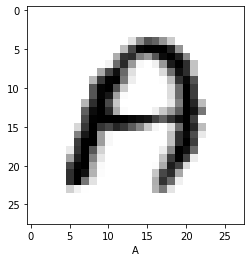

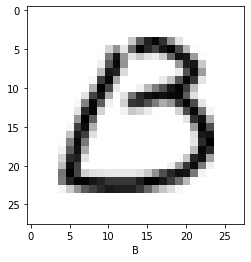

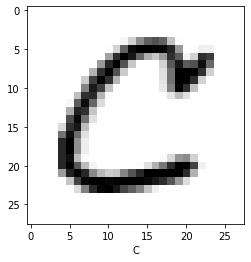

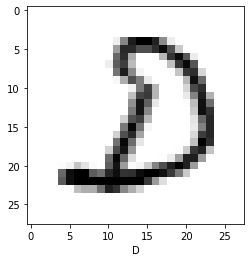

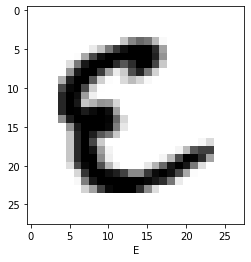

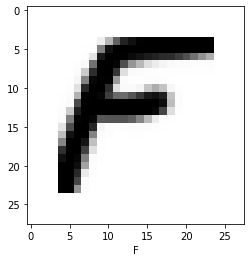

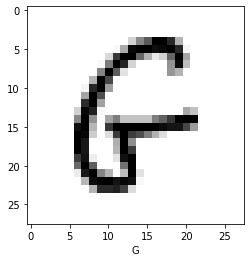

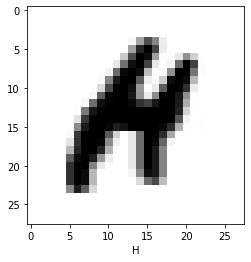

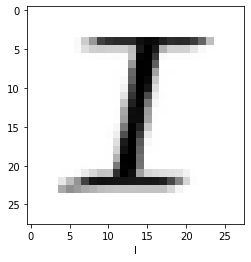

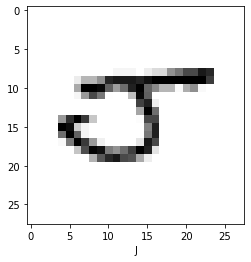

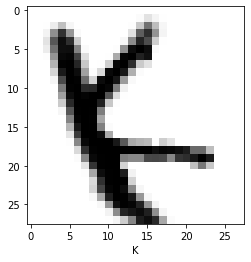

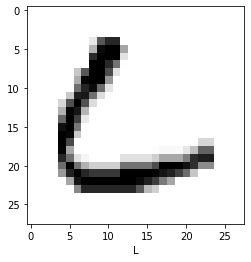

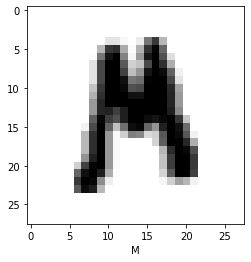

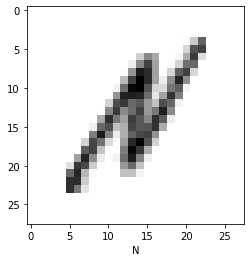

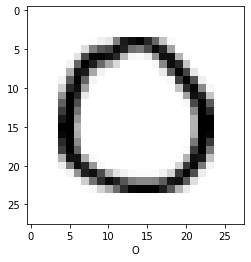

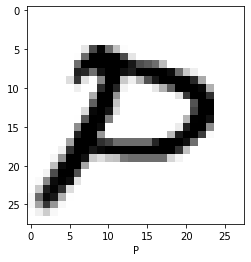

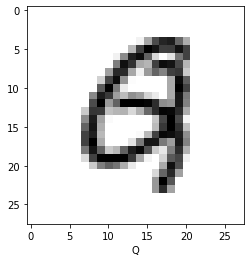

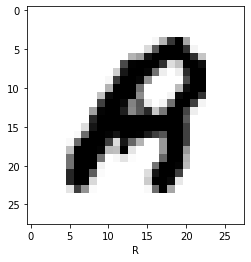

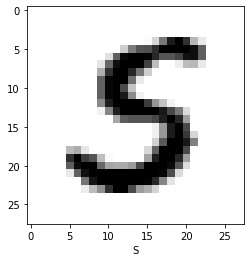

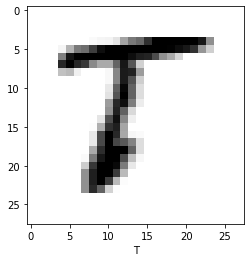

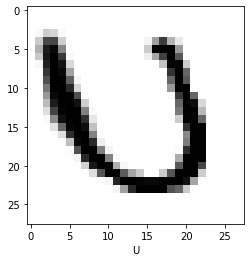

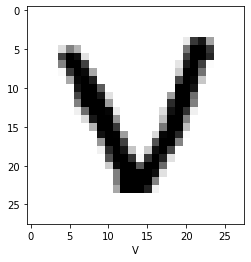

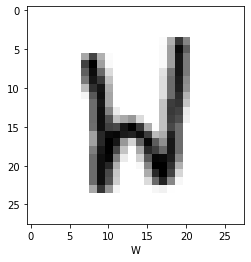

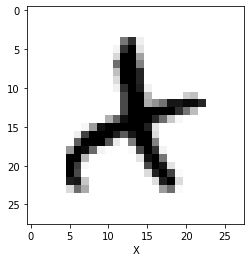

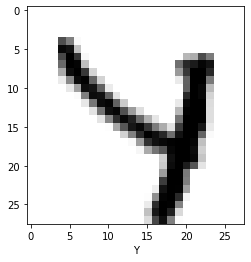

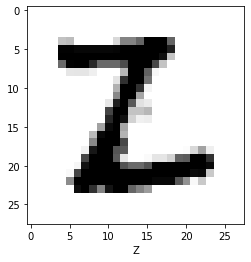

In [7]:
for i in range(26):
    dd = df[df['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    plt.xlabel(encoded[i])
    plt.imshow(x, cmap='binary')
    plt.show()

In [8]:
type(y)
y.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [9]:
ohe = OneHotEncoder()
y_train = keras.utils.to_categorical(y_train, num_classes = 26, dtype='int')
y_test = keras.utils.to_categorical(y_test, num_classes = 26, dtype='int')
print('new shape for y train : ', y_train.shape)
print('new shape for y test: ', y_test.shape)

new shape for y train :  (297960, 26)
new shape for y test:  (74490, 26)


# Phase 2


In [10]:
input = keras.layers.Input(shape=(28,28,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='relu')(output)
output = keras.layers.Dense(512, activation='relu')(output)
output = keras.layers.Dense(26, activation='softmax')(output)

In [11]:
model = keras.models.Model(inputs=input, outputs=output)

In [12]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [13]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="binary_crossentropy",metrics=['accuracy'])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
Non-trainable params: 0
_________________________________________________________________


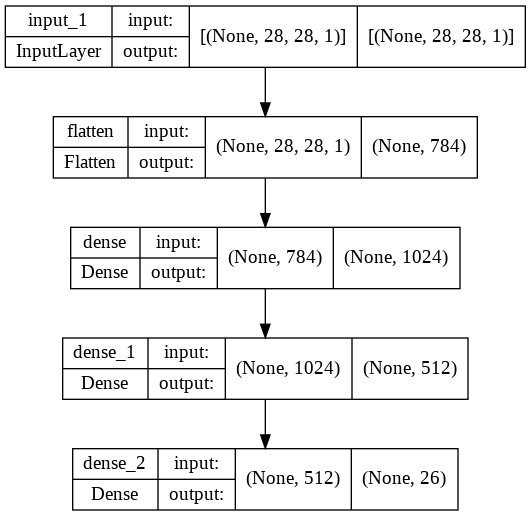

In [15]:
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [15]:

log = model.fit(x_train,y_train,batch_size=32, epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
9312/9312 [==============================] - 165s 18ms/step - loss: 0.0566 - accuracy: 0.8807 - val_loss: 0.0217 - val_accuracy: 0.9268
Epoch 2/10
9312/9312 [==============================] - 153s 16ms/step - loss: 0.0170 - accuracy: 0.9434 - val_loss: 0.0163 - val_accuracy: 0.9461
Epoch 3/10
9312/9312 [==============================] - 153s 16ms/step - loss: 0.0127 - accuracy: 0.9584 - val_loss: 0.0137 - val_accuracy: 0.9554
Epoch 4/10
9312/9312 [==============================] - 154s 17ms/step - loss: 0.0103 - accuracy: 0.9669 - val_loss: 0.0123 - val_accuracy: 0.9609
Epoch 5/10
9312/9312 [==============================] - 153s 16ms/step - loss: 0.0087 - accuracy: 0.9727 - val_loss: 0.0110 - val_accuracy: 0.9647
Epoch 6/10
9312/9312 [==============================] - 152s 16ms/step - loss: 0.0075 - accuracy: 0.9770 - val_loss: 0.0101 - val_accuracy: 0.9686
Epoch 7/10
9312/9312 [==============================] - 153s 16ms/step - loss: 0.0065 - accuracy: 0.9802 - val_loss: 0

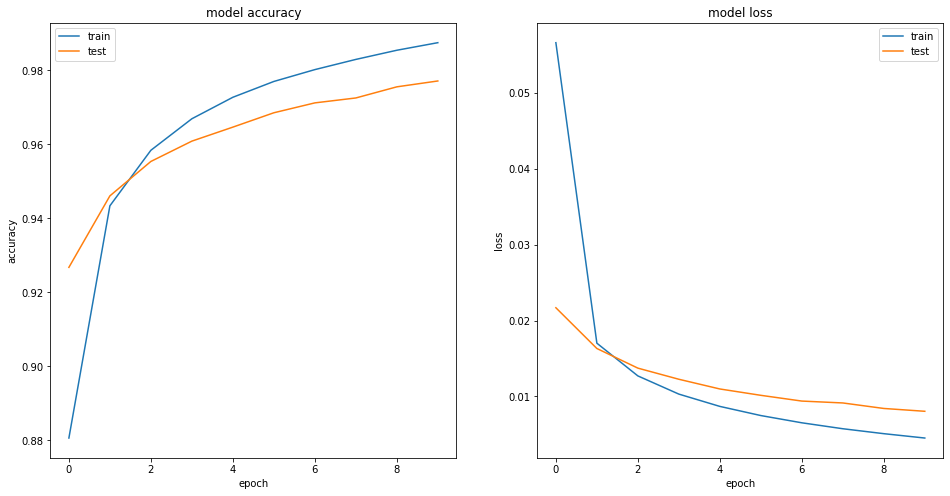

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [17]:
selected = np.random.randint(x_test.shape[0], size=100)
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print('Test Score:',f1_score)
print('Test Accuracy:',accuracy*100)
print('Test Precision:',precision)
print('Test Loss:',loss)
print('Test Recall:',recall)

Test Score: 0.9790397882461548
Test Accuracy: 97.86951541900635
Test Precision: 0.9806459546089172
Test Loss: 0.007460727356374264
Test Recall: 0.9774886965751648


In [22]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(np.array(y_pred), axis=1)

print(classification_report(y_pred_bool,np.argmax(np.array(y_test), axis=1)))

2328/2328 [==============================] - 16s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2851
           1       0.97      0.95      0.96      1747
           2       0.99      0.98      0.98      4679
           3       0.95      0.93      0.94      2046
           4       0.97      0.96      0.97      2276
           5       0.93      0.94      0.94       230
           6       0.92      0.96      0.94      1111
           7       0.94      0.94      0.94      1415
           8       0.88      0.98      0.93       194
           9       0.96      0.97      0.97      1696
          10       0.94      0.96      0.95      1114
          11       0.98      0.99      0.98      2277
          12       0.96      0.98      0.97      2480
          13       0.98      0.97      0.97      3814
          14       0.99      0.99      0.99     11523
          15       0.99      0.99      0.99      3895
          16       0.95

In [18]:
data = np.array(df)
X = data.T[1:].T
Y = data.T[0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [19]:


X_train = np.reshape(X_train.astype('float32')/255.0, (X_train.shape[0], 28, 28))
X_test = np.reshape(X_test.astype('float32')/255.0, (X_test.shape[0], 28, 28))
ohe = OneHotEncoder()
Y_train = keras.utils.to_categorical(Y_train, num_classes = 26, dtype='int')
Y_test = keras.utils.to_categorical(Y_test, num_classes = 26, dtype='int')
print('new shape for y train : ', Y_train.shape)
print('new shape for y test: ', Y_test.shape)

new shape for y train :  (316582, 26)
new shape for y test:  (55868, 26)


### Create new input and output for keras and using Tanh

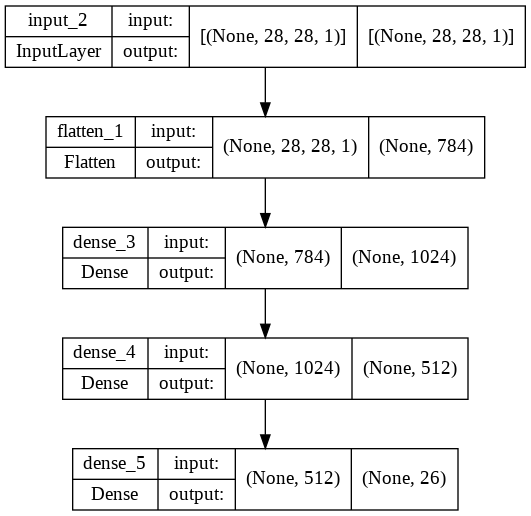

In [20]:
input = keras.layers.Input(shape=(28,28,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='tanh')(output)
output = keras.layers.Dense(512, activation='tanh')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="binary_crossentropy",metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [21]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))


Epoch 1/10
9894/9894 [==============================] - 168s 17ms/step - loss: 0.1052 - accuracy: 0.5373 - val_loss: 0.0774 - val_accuracy: 0.6780
Epoch 2/10
9894/9894 [==============================] - 166s 17ms/step - loss: 0.0683 - accuracy: 0.7269 - val_loss: 0.0617 - val_accuracy: 0.7595
Epoch 3/10
9894/9894 [==============================] - 162s 16ms/step - loss: 0.0576 - accuracy: 0.7799 - val_loss: 0.0545 - val_accuracy: 0.7924
Epoch 4/10
9894/9894 [==============================] - 159s 16ms/step - loss: 0.0521 - accuracy: 0.8037 - val_loss: 0.0502 - val_accuracy: 0.8116
Epoch 5/10
9894/9894 [==============================] - 160s 16ms/step - loss: 0.0486 - accuracy: 0.8182 - val_loss: 0.0472 - val_accuracy: 0.8225
Epoch 6/10
9894/9894 [==============================] - 157s 16ms/step - loss: 0.0460 - accuracy: 0.8287 - val_loss: 0.0449 - val_accuracy: 0.8323
Epoch 7/10
9894/9894 [==============================] - 162s 16ms/step - loss: 0.0440 - accuracy: 0.8366 - val_loss: 0

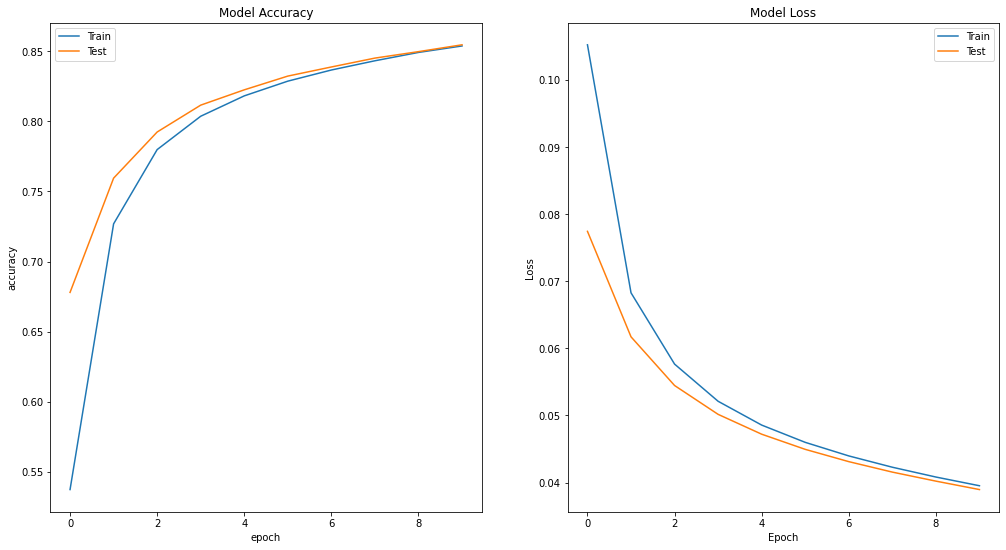

In [22]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [23]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 10s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2277
           1       0.71      0.81      0.76      1161
           2       0.90      0.89      0.89      3563
           3       0.71      0.79      0.75      1388
           4       0.77      0.80      0.79      1621
           5       0.42      0.94      0.58        77
           6       0.65      0.85      0.74       682
           7       0.58      0.76      0.66       824
           8       0.44      0.95      0.60        88
           9       0.61      0.79      0.69       989
          10       0.67      0.72      0.70       809
          11       0.94      0.88      0.91      1772
          12       0.90      0.83      0.86      1932
          13       0.81      0.77      0.79      2930
          14       0.97      0.90      0.94      9267
          15       0.93      0.87      0.89      3122
          16       0.66

### Leaky Relu

In [25]:

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
Non-

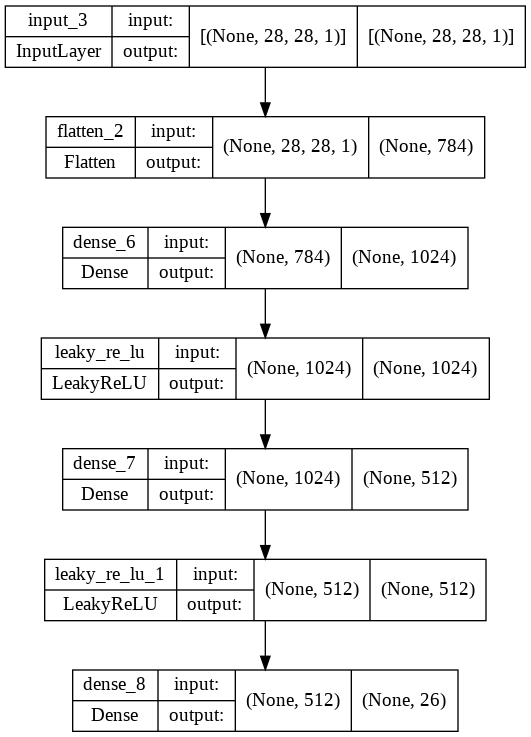

In [27]:
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [28]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))


Epoch 1/10
9894/9894 [==============================] - 166s 17ms/step - loss: 0.1204 - accuracy: 0.4697 - val_loss: 0.0850 - val_accuracy: 0.6479
Epoch 2/10
9894/9894 [==============================] - 168s 17ms/step - loss: 0.0719 - accuracy: 0.7153 - val_loss: 0.0625 - val_accuracy: 0.7567
Epoch 3/10
9894/9894 [==============================] - 165s 17ms/step - loss: 0.0568 - accuracy: 0.7840 - val_loss: 0.0524 - val_accuracy: 0.8017
Epoch 4/10
9894/9894 [==============================] - 163s 17ms/step - loss: 0.0492 - accuracy: 0.8145 - val_loss: 0.0467 - val_accuracy: 0.8219
Epoch 5/10
9894/9894 [==============================] - 163s 16ms/step - loss: 0.0446 - accuracy: 0.8314 - val_loss: 0.0429 - val_accuracy: 0.8368
Epoch 6/10
9894/9894 [==============================] - 163s 17ms/step - loss: 0.0414 - accuracy: 0.8440 - val_loss: 0.0401 - val_accuracy: 0.8474
Epoch 7/10
9894/9894 [==============================] - 163s 16ms/step - loss: 0.0389 - accuracy: 0.8531 - val_loss: 0

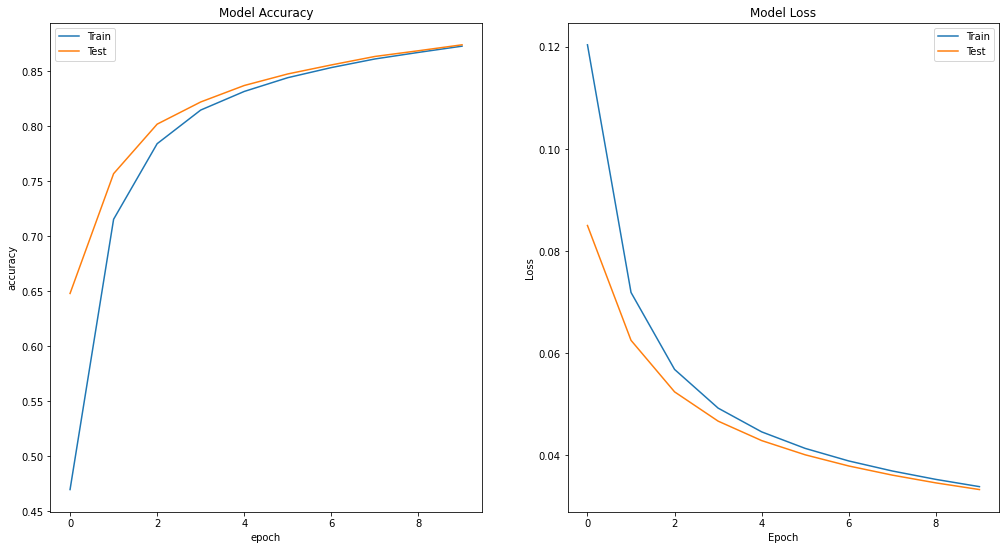

In [29]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [30]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 11s 6ms/step
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2224
           1       0.74      0.83      0.79      1177
           2       0.90      0.92      0.91      3470
           3       0.75      0.82      0.78      1396
           4       0.81      0.83      0.82      1642
           5       0.55      0.95      0.70       100
           6       0.72      0.86      0.78       740
           7       0.63      0.79      0.70       861
           8       0.55      0.95      0.70       110
           9       0.67      0.83      0.74      1046
          10       0.69      0.75      0.72       809
          11       0.95      0.88      0.91      1788
          12       0.91      0.82      0.86      1959
          13       0.83      0.79      0.81      2936
          14       0.97      0.92      0.95      9128
          15       0.94      0.89      0.91      3084
          16       0.69

## Sigmoid

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 1024)              803840    
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
Non-trainable params: 0
_________________________________________________________________


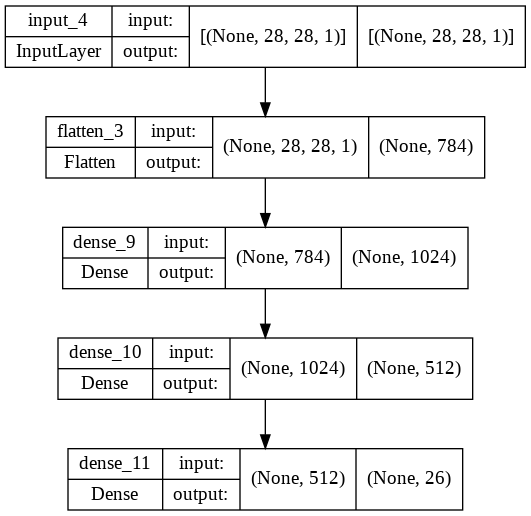

In [31]:
input = keras.layers.Input(shape=(28,28,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(1024, activation='sigmoid')(output)
output = keras.layers.Dense(512, activation='sigmoid')(output)
output = keras.layers.Dense(26, activation='softmax')(output)
model = keras.models.Model(inputs=input, outputs=output)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="binary_crossentropy",metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [32]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))


Epoch 1/10
9894/9894 [==============================] - 180s 18ms/step - loss: 0.1522 - accuracy: 0.1550 - val_loss: 0.1478 - val_accuracy: 0.1619
Epoch 2/10
9894/9894 [==============================] - 163s 16ms/step - loss: 0.1464 - accuracy: 0.1899 - val_loss: 0.1452 - val_accuracy: 0.2374
Epoch 3/10
9894/9894 [==============================] - 164s 17ms/step - loss: 0.1435 - accuracy: 0.2395 - val_loss: 0.1419 - val_accuracy: 0.2583
Epoch 4/10
9894/9894 [==============================] - 167s 17ms/step - loss: 0.1396 - accuracy: 0.2626 - val_loss: 0.1375 - val_accuracy: 0.2710
Epoch 5/10
9894/9894 [==============================] - 179s 18ms/step - loss: 0.1348 - accuracy: 0.2829 - val_loss: 0.1324 - val_accuracy: 0.2922
Epoch 6/10
9894/9894 [==============================] - 177s 18ms/step - loss: 0.1295 - accuracy: 0.3160 - val_loss: 0.1270 - val_accuracy: 0.3299
Epoch 7/10
9894/9894 [==============================] - 175s 18ms/step - loss: 0.1242 - accuracy: 0.3512 - val_loss: 0

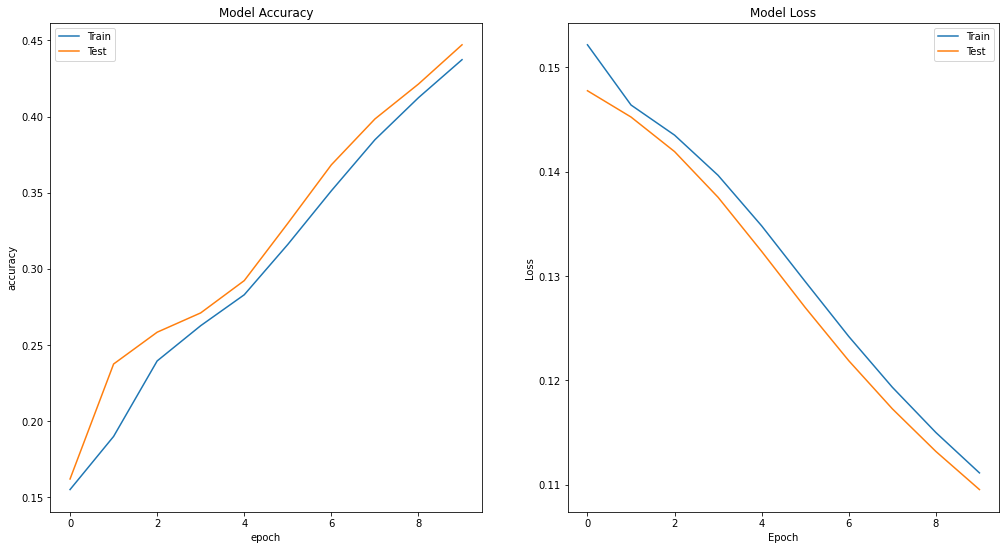

In [33]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [34]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 11s 6ms/step
              precision    recall  f1-score   support

           0       0.14      0.72      0.23       404
           1       0.00      0.00      0.00         0
           2       0.33      0.56      0.42      2090
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      1.00      0.00         1
          12       0.12      1.00      0.21       209
          13       0.42      0.28      0.34      4139
          14       0.95      0.61      0.74     13352
          15       0.40      0.32      0.35      3643
          16       0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Optimizers:

### momentum 0.5

In [42]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.5), loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
No

In [43]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
9894/9894 [==============================] - 175s 18ms/step - loss: 0.0976 - accuracy: 0.5874 - val_loss: 0.0636 - val_accuracy: 0.7520
Epoch 2/10
9894/9894 [==============================] - 182s 18ms/step - loss: 0.0537 - accuracy: 0.7956 - val_loss: 0.0471 - val_accuracy: 0.8203
Epoch 3/10
9894/9894 [==============================] - 180s 18ms/step - loss: 0.0433 - accuracy: 0.8361 - val_loss: 0.0404 - val_accuracy: 0.8466
Epoch 4/10
9894/9894 [==============================] - 200s 20ms/step - loss: 0.0382 - accuracy: 0.8563 - val_loss: 0.0364 - val_accuracy: 0.8622
Epoch 5/10
9894/9894 [==============================] - 172s 17ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0334 - val_accuracy: 0.8759
Epoch 6/10
9894/9894 [==============================] - 171s 17ms/step - loss: 0.0322 - accuracy: 0.8804 - val_loss: 0.0312 - val_accuracy: 0.8841
Epoch 7/10
9894/9894 [==============================] - 173s 17ms/step - loss: 0.0301 - accuracy: 0.8889 - val_loss: 0

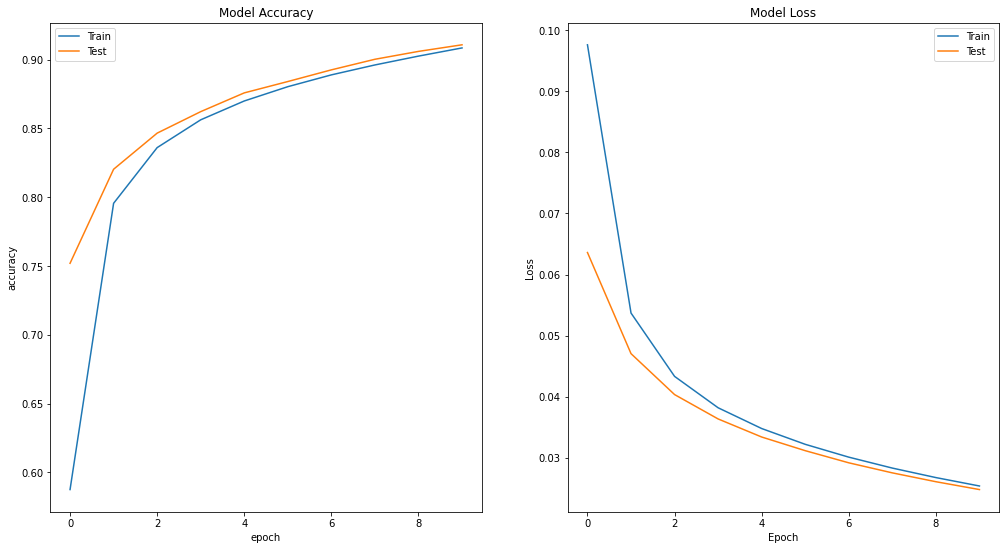

In [44]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [45]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 9s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2225
           1       0.81      0.87      0.84      1236
           2       0.94      0.93      0.93      3542
           3       0.81      0.88      0.84      1412
           4       0.84      0.88      0.86      1598
           5       0.73      0.95      0.83       133
           6       0.77      0.90      0.83       764
           7       0.74      0.83      0.78       962
           8       0.70      0.93      0.80       143
           9       0.81      0.89      0.84      1169
          10       0.78      0.77      0.77       880
          11       0.96      0.90      0.93      1766
          12       0.92      0.88      0.90      1866
          13       0.88      0.87      0.87      2839
          14       0.98      0.94      0.96      8975
          15       0.96      0.93      0.94      3018
          16       0.79 

### Momentum 0.9

In [46]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
No

In [47]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
9894/9894 [==============================] - 170s 17ms/step - loss: 0.0978 - accuracy: 0.5844 - val_loss: 0.0633 - val_accuracy: 0.7543
Epoch 2/10
9894/9894 [==============================] - 169s 17ms/step - loss: 0.0535 - accuracy: 0.7974 - val_loss: 0.0469 - val_accuracy: 0.8233
Epoch 3/10
9894/9894 [==============================] - 174s 18ms/step - loss: 0.0432 - accuracy: 0.8372 - val_loss: 0.0402 - val_accuracy: 0.8482
Epoch 4/10
9894/9894 [==============================] - 182s 18ms/step - loss: 0.0381 - accuracy: 0.8567 - val_loss: 0.0362 - val_accuracy: 0.8611
Epoch 5/10
9894/9894 [==============================] - 171s 17ms/step - loss: 0.0347 - accuracy: 0.8699 - val_loss: 0.0333 - val_accuracy: 0.8743
Epoch 6/10
9894/9894 [==============================] - 197s 20ms/step - loss: 0.0322 - accuracy: 0.8802 - val_loss: 0.0311 - val_accuracy: 0.8836
Epoch 7/10
9894/9894 [==============================] - 176s 18ms/step - loss: 0.0301 - accuracy: 0.8889 - val_loss: 0

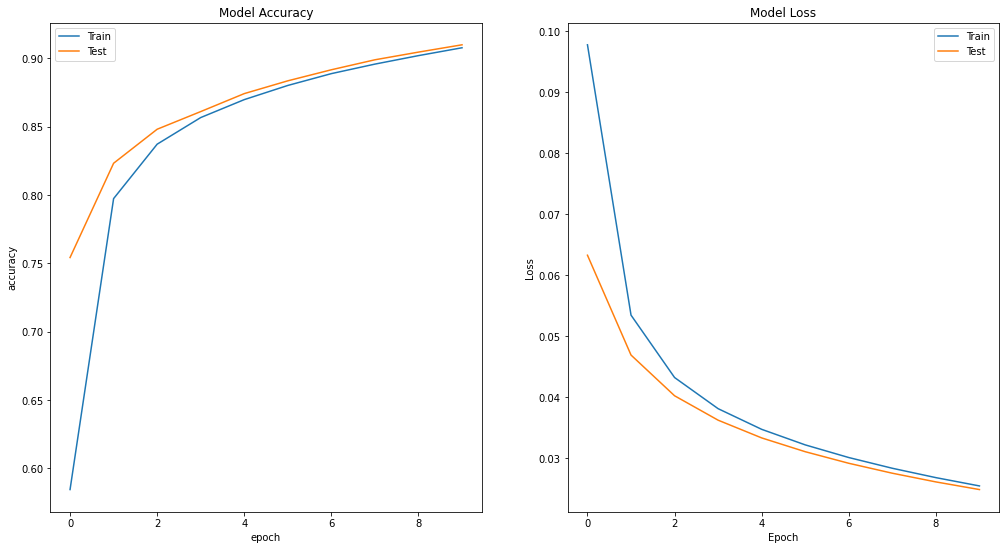

In [48]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [49]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 9s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2241
           1       0.79      0.88      0.83      1187
           2       0.93      0.94      0.93      3478
           3       0.82      0.87      0.84      1449
           4       0.85      0.87      0.86      1649
           5       0.71      0.96      0.82       128
           6       0.78      0.89      0.83       772
           7       0.72      0.84      0.77       935
           8       0.69      0.94      0.80       140
           9       0.82      0.88      0.85      1190
          10       0.79      0.78      0.79       881
          11       0.96      0.90      0.93      1779
          12       0.93      0.87      0.90      1910
          13       0.87      0.87      0.87      2815
          14       0.98      0.94      0.96      8955
          15       0.95      0.92      0.93      3014
          16       0.77 

### Momentum 0.98

In [50]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.98), loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
No

In [51]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
9894/9894 [==============================] - 173s 17ms/step - loss: 0.0315 - accuracy: 0.8785 - val_loss: 0.0161 - val_accuracy: 0.9461
Epoch 2/10
9894/9894 [==============================] - 177s 18ms/step - loss: 0.0125 - accuracy: 0.9568 - val_loss: 0.0104 - val_accuracy: 0.9645
Epoch 3/10
9894/9894 [==============================] - 176s 18ms/step - loss: 0.0090 - accuracy: 0.9699 - val_loss: 0.0082 - val_accuracy: 0.9728
Epoch 4/10
9894/9894 [==============================] - 169s 17ms/step - loss: 0.0072 - accuracy: 0.9768 - val_loss: 0.0073 - val_accuracy: 0.9753
Epoch 5/10
9894/9894 [==============================] - 171s 17ms/step - loss: 0.0060 - accuracy: 0.9811 - val_loss: 0.0064 - val_accuracy: 0.9789
Epoch 6/10
9894/9894 [==============================] - 179s 18ms/step - loss: 0.0051 - accuracy: 0.9841 - val_loss: 0.0061 - val_accuracy: 0.9807
Epoch 7/10
9894/9894 [==============================] - 198s 20ms/step - loss: 0.0044 - accuracy: 0.9866 - val_loss: 0

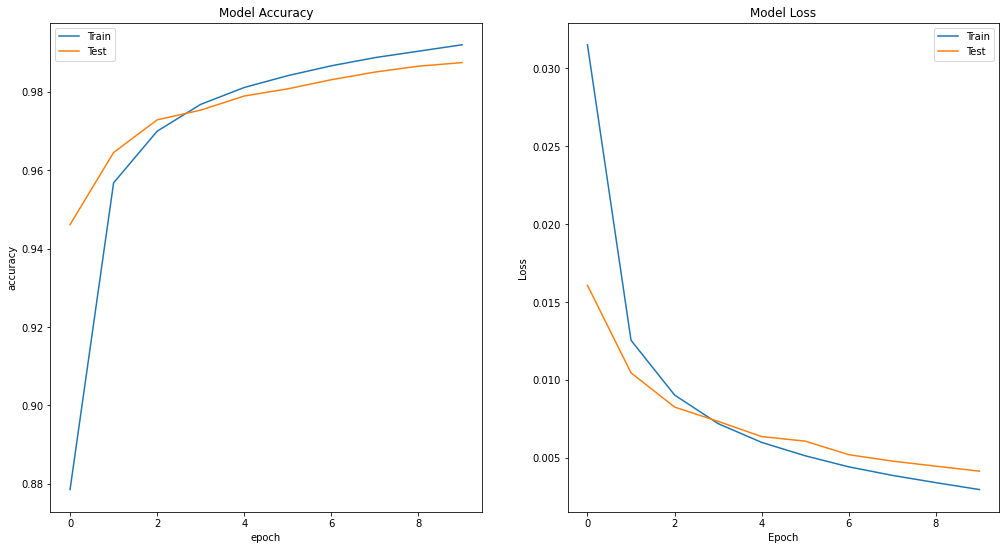

In [52]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [53]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 9s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2151
           1       0.98      0.98      0.98      1318
           2       0.99      0.99      0.99      3512
           3       0.96      0.98      0.97      1509
           4       0.98      1.00      0.99      1660
           5       0.93      0.96      0.94       168
           6       0.96      0.98      0.97       869
           7       0.96      0.97      0.97      1073
           8       0.96      0.98      0.97       186
           9       0.97      0.98      0.98      1282
          10       0.98      0.97      0.97       884
          11       0.99      0.98      0.98      1689
          12       0.99      0.99      0.99      1778
          13       0.98      0.99      0.99      2779
          14       1.00      0.99      0.99      8673
          15       0.99      0.99      0.99      2919
          16       0.98 

# Adam

In [54]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
No

In [55]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
9894/9894 [==============================] - 185s 19ms/step - loss: 0.0128 - accuracy: 0.9508 - val_loss: 0.0085 - val_accuracy: 0.9675
Epoch 2/10
9894/9894 [==============================] - 206s 21ms/step - loss: 0.0061 - accuracy: 0.9782 - val_loss: 0.0057 - val_accuracy: 0.9803
Epoch 3/10
9894/9894 [==============================] - 208s 21ms/step - loss: 0.0048 - accuracy: 0.9836 - val_loss: 0.0054 - val_accuracy: 0.9808
Epoch 4/10
9894/9894 [==============================] - 177s 18ms/step - loss: 0.0040 - accuracy: 0.9870 - val_loss: 0.0053 - val_accuracy: 0.9854
Epoch 5/10
9894/9894 [==============================] - 178s 18ms/step - loss: 0.0035 - accuracy: 0.9893 - val_loss: 0.0051 - val_accuracy: 0.9860
Epoch 6/10
9894/9894 [==============================] - 179s 18ms/step - loss: 0.0032 - accuracy: 0.9910 - val_loss: 0.0057 - val_accuracy: 0.9866
Epoch 7/10
9894/9894 [==============================] - 189s 19ms/step - loss: 0.0030 - accuracy: 0.9920 - val_loss: 0

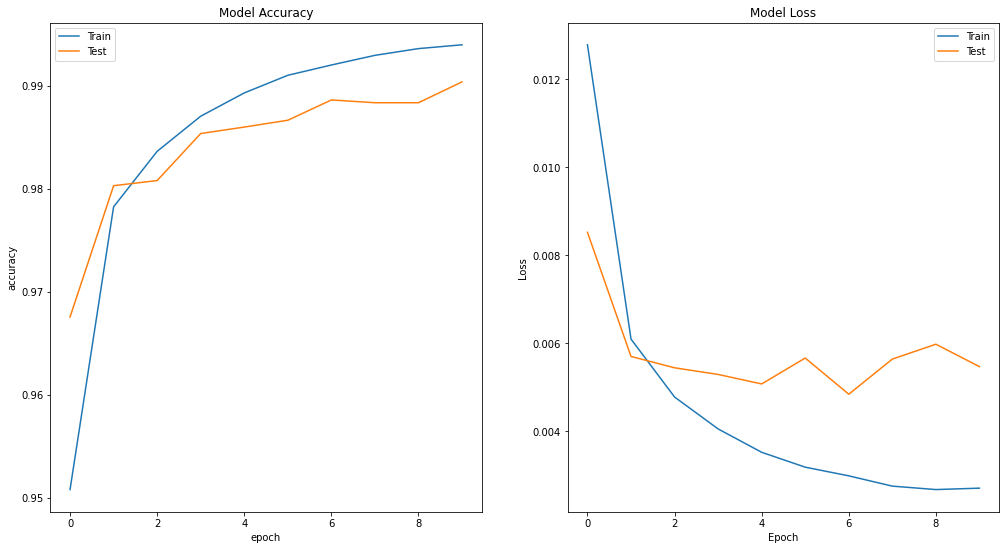

In [56]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [57]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 10s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2098
           1       0.99      0.99      0.99      1318
           2       0.99      1.00      0.99      3517
           3       0.98      0.95      0.96      1594
           4       0.99      0.99      0.99      1681
           5       0.94      0.99      0.96       164
           6       0.98      0.96      0.97       904
           7       0.98      0.98      0.98      1082
           8       0.99      0.97      0.98       195
           9       0.98      0.99      0.99      1271
          10       0.97      0.98      0.98       859
          11       0.99      0.99      0.99      1668
          12       0.99      0.99      0.99      1789
          13       0.99      0.99      0.99      2792
          14       0.99      1.00      0.99      8550
          15       1.00      0.99      0.99      2951
          16       0.98

# ‫‪Function‬‬ ‫‪Loss‬‬:
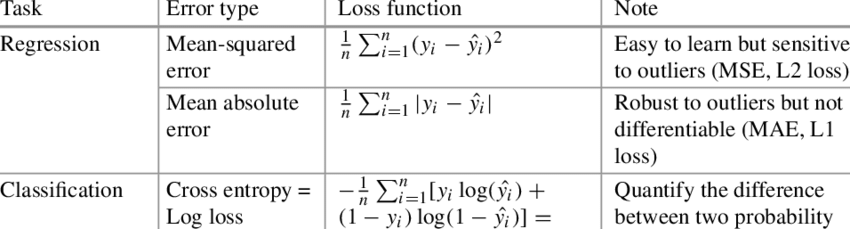

#### As you can see in the picture Cross-entropy is prefered for Classification ,but MSE is for regression.Actually , in classification we will work with very particular set of possible output values so MSE is badly defined,

In [58]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss="mean_squared_error",metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
N

In [59]:
log = model.fit(X_train,Y_train,batch_size=32, epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
9894/9894 [==============================] - 173s 17ms/step - loss: 0.0042 - accuracy: 0.9294 - val_loss: 0.0033 - val_accuracy: 0.9497
Epoch 2/10
9894/9894 [==============================] - 175s 18ms/step - loss: 0.0037 - accuracy: 0.9477 - val_loss: 0.0039 - val_accuracy: 0.9459
Epoch 3/10
9894/9894 [==============================] - 178s 18ms/step - loss: 0.0042 - accuracy: 0.9431 - val_loss: 0.0040 - val_accuracy: 0.9461
Epoch 4/10
9894/9894 [==============================] - 176s 18ms/step - loss: 0.0045 - accuracy: 0.9402 - val_loss: 0.0045 - val_accuracy: 0.9408
Epoch 5/10
9894/9894 [==============================] - 170s 17ms/step - loss: 0.0047 - accuracy: 0.9377 - val_loss: 0.0044 - val_accuracy: 0.9420
Epoch 6/10
9894/9894 [==============================] - 177s 18ms/step - loss: 0.0049 - accuracy: 0.9363 - val_loss: 0.0054 - val_accuracy: 0.9297
Epoch 7/10
9894/9894 [==============================] - 173s 18ms/step - loss: 0.0053 - accuracy: 0.9305 - val_loss: 0

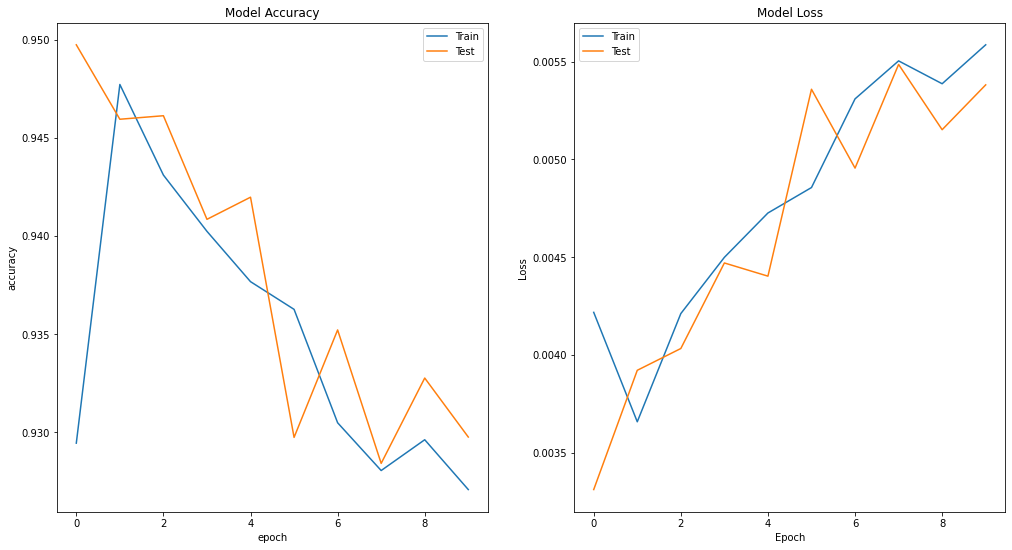

In [60]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [61]:
Y_pred = model.predict(X_test, batch_size=32, verbose=1)
Y_pred_bool = np.argmax(np.array(Y_pred), axis=1)

print(classification_report(Y_pred_bool,np.argmax(np.array(Y_test), axis=1)))

1746/1746 [==============================] - 9s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2108
           1       0.82      0.94      0.88      1156
           2       0.98      0.86      0.91      4043
           3       0.77      0.91      0.83      1287
           4       0.80      0.95      0.87      1419
           5       0.72      0.95      0.82       130
           6       0.88      0.90      0.89       867
           7       0.78      0.94      0.85       898
           8       0.87      0.91      0.89       183
           9       0.88      0.87      0.88      1300
          10       0.76      0.94      0.84       707
          11       0.94      0.90      0.92      1741
          12       0.95      0.94      0.95      1799
          13       0.96      0.85      0.90      3139
          14       0.98      0.94      0.96      8953
          15       0.95      0.95      0.95      2921
          16       0.78 

In [64]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(512,kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dense(26, activation='softmax',kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 26)                13338     
                                                                 
Total params: 1,341,978
Trainable params: 1,341,978
N

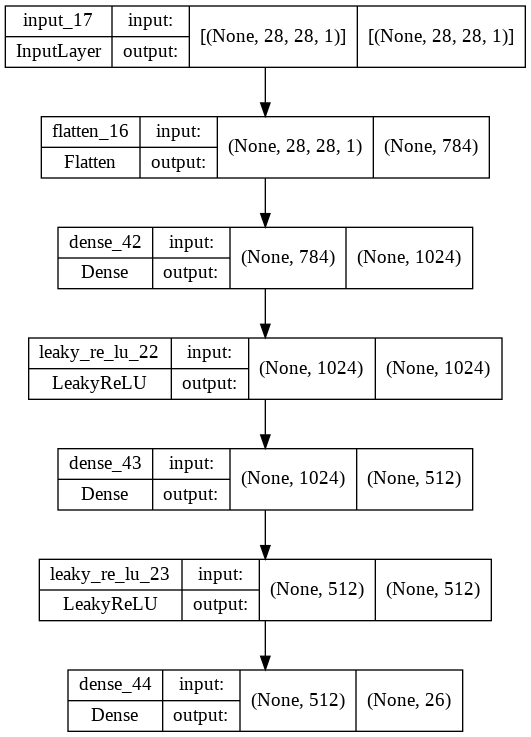

In [65]:
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)